In [1]:
import pandas as pd 
import numpy as np

df=pd.read_csv("kddcup99_csv.csv")

df["label"].unique()

array(['normal', 'buffer_overflow', 'loadmodule', 'perl', 'neptune',
       'smurf', 'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep',
       'land', 'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap',
       'multihop', 'warezmaster', 'warezclient', 'spy', 'rootkit'],
      dtype=object)

In [2]:
# check missing data
print('Number of missing values in the training dataset:',sum(df.isnull().sum()))

Number of missing values in the training dataset: 0


In [3]:
#percentage of each label
per_label=(df["label"].value_counts())
per_label

label
smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: count, dtype: int64

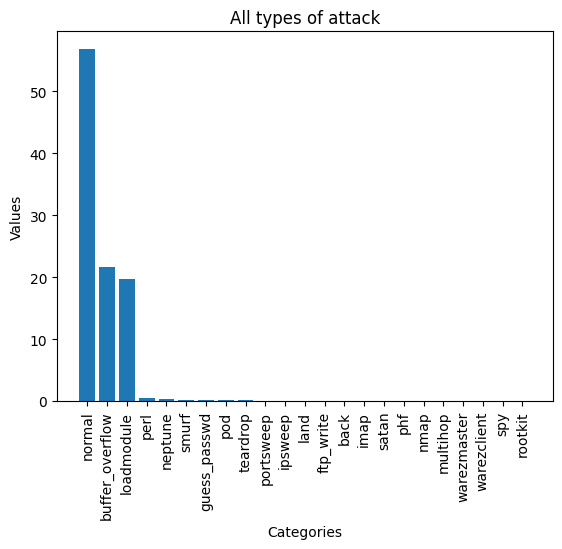

<Figure size 1000x600 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt

# Your existing code
categories = df["label"].unique()
values = (df["label"].value_counts() / len(df["label"]) * 100)

# Create bar graph
plt.bar(categories, values)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('All types of attack')

# Rotate x-axis labels and adjust figure size
plt.xticks(rotation=90)
plt.figure(figsize=(10, 6))
# Save the plot and display it
plt.savefig('Alltypesofattacks')
plt.show()


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

sub_to_main_category = {
    'normal': 'normal',
    'buffer_overflow': 'R2L',
    'loadmodule': 'R2L',
    'perl': 'R2L',
    'neptune': 'DOS',
    'smurf': 'DOS',
    'guess_passwd': 'U2R',
    'pod': 'DOS',
    'teardrop': 'DOS',
    'portsweep': 'PRB',
    'ipsweep': 'PRB',
    'land': 'DOS',
    'ftp_write': 'U2R',
    'back': 'DOS',
    'imap': 'U2R',
    'satan': 'PRB',
    'phf': 'U2R',
    'nmap': 'PRB',
    'multihop': 'R2L',
    'warezmaster': 'U2R',
    'warezclient': 'U2R',
    'spy': 'U2R',
    'rootkit': 'R2L'
}
# Map subcategories to categories
df['category'] = df['label'].map(sub_to_main_category)
df.drop('label', axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [6]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'category'],
      dtype='object')

In [7]:
# Count the number of records in each category
category_counts = df['category'].value_counts()

# Display the counts
print(category_counts)

category
DOS       391458
normal     97277
PRB         4107
U2R         1119
R2L           59
Name: count, dtype: int64


In [8]:
df['category'].unique()

array(['normal', 'R2L', 'DOS', 'U2R', 'PRB'], dtype=object)

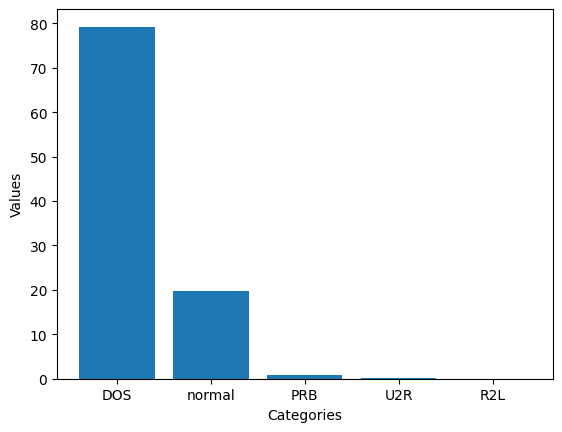

In [9]:
import matplotlib.pyplot as plt

# Sample data
categories = ['DOS','normal','PRB','U2R','R2L']
values = (df['category'].value_counts()/len(df["category"])*100)

# Create bar graph
plt.bar(categories, values)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')

# Display the plot
plt.show()

In [10]:
# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
for col in ['protocol_type', 'service', 'flag', 'category']:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])

# Drop the original categorical columns
df_numeric = df.drop(['protocol_type', 'service', 'flag', 'category'], axis=1)

In [11]:
df_numeric

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_encoded,service_encoded,flag_encoded,category_encoded
0,0,181,5450,0,0,0,0,0,1,0,...,0.11,0.00,0.00,0.00,0.0,0.0,1,22,9,4
1,0,239,486,0,0,0,0,0,1,0,...,0.05,0.00,0.00,0.00,0.0,0.0,1,22,9,4
2,0,235,1337,0,0,0,0,0,1,0,...,0.03,0.00,0.00,0.00,0.0,0.0,1,22,9,4
3,0,219,1337,0,0,0,0,0,1,0,...,0.03,0.00,0.00,0.00,0.0,0.0,1,22,9,4
4,0,217,2032,0,0,0,0,0,1,0,...,0.02,0.00,0.00,0.00,0.0,0.0,1,22,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,310,1881,0,0,0,0,0,1,0,...,0.01,0.05,0.00,0.01,0.0,0.0,1,22,9,4
494016,0,282,2286,0,0,0,0,0,1,0,...,0.17,0.05,0.00,0.01,0.0,0.0,1,22,9,4
494017,0,203,1200,0,0,0,0,0,1,0,...,0.06,0.05,0.06,0.01,0.0,0.0,1,22,9,4
494018,0,291,1200,0,0,0,0,0,1,0,...,0.04,0.05,0.04,0.01,0.0,0.0,1,22,9,4


In [12]:
#Calculate the correlation matrix
#Feature Selection using Pearson Correlation
#df_numeric.drop('category_encoded', axis=1, inplace=True)
# Calculate Pearson correlation coefficients between each feature and the target variable
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

correlation_matrix = np.corrcoef(df_numeric.values.T)

# Get the absolute correlation coefficients for each feature
feature_correlation = abs(correlation_matrix[:-1, -1])

# Select features with correlation coefficient greater than threshold (0.5)
threshold = 0.1
selected_features_pearson = df_numeric.columns[:-1][feature_correlation > threshold]

print("Selected features using Pearson correlation:", selected_features_pearson)

print(len(selected_features_pearson))

# Filter the original dataframe df_numeric to include only the selected features
X_selected = df_numeric[selected_features_pearson]
y=df_numeric['category_encoded']

Selected features using Pearson correlation: Index(['duration', 'logged_in', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'same_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'protocol_type_encoded', 'service_encoded', 'flag_encoded'],
      dtype='object')
18


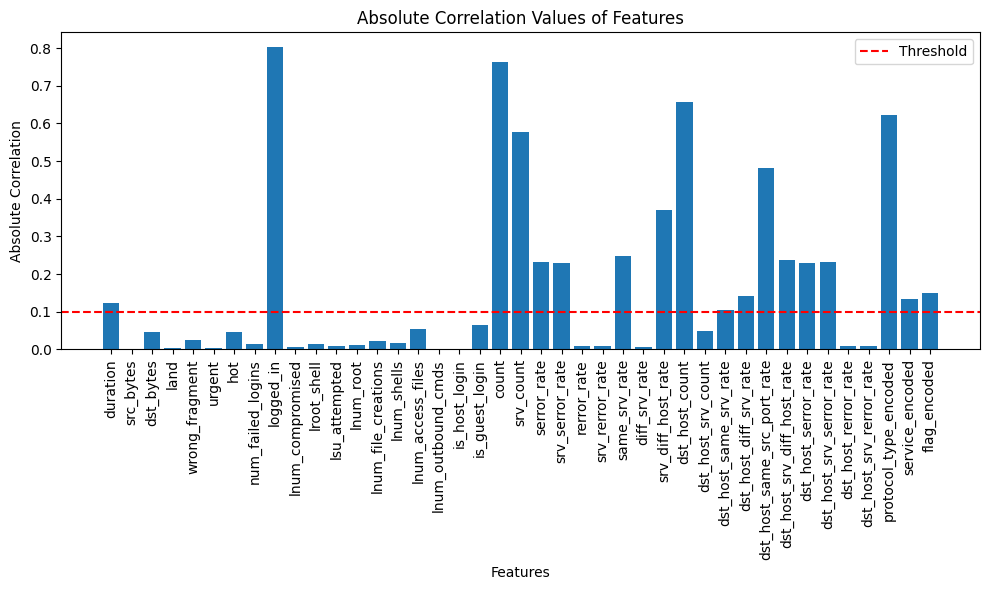

In [13]:
# Plotting the absolute correlation values of all features
plt.figure(figsize=(10, 6))
plt.bar(df_numeric.columns[:-1], feature_correlation)
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.title('Absolute Correlation Values of Features')
plt.xticks(rotation=90)
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.tight_layout()
plt.savefig('Absolute Correlation Values of Features')
plt.show()

In [14]:
correlation_matrix.shape

(42, 42)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

X_selected = df_numeric[selected_features_pearson]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()  # You can adjust hyperparameters as needed

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)



In [16]:
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.996214728148658
Precision: 0.9962478647447474
Recall: 0.996214728148658
F1 Score: 0.9962113624129113

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78354
           1       0.99      0.98      0.99       834
           2       1.00      0.56      0.72        16
           3       0.97      0.94      0.95       234
           4       0.98      1.00      0.99     19366

    accuracy                           1.00     98804
   macro avg       0.99      0.89      0.93     98804
weighted avg       1.00      1.00      1.00     98804



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78354
           1       0.99      0.98      0.99       834
           2       1.00      0.56      0.72        16
           3       0.97      0.94      0.95       234
           4       0.98      1.00      0.99     19366

    accuracy                           1.00     98804
   macro avg       0.99      0.89      0.93     98804
weighted avg       1.00      1.00      1.00     98804



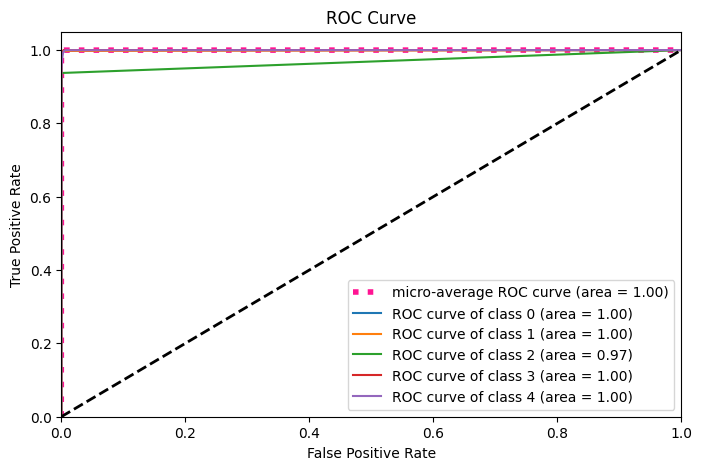

In [17]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer

# Predict probabilities for each class
y_prob = rf_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
n_classes = len(rf_classifier.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

# Binarize the labels
lb = LabelBinarizer()
lb.fit(y_test)
y_test_bin = lb.transform(y_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_prob[:, i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc["micro"] = roc_auc_score(y_test_bin, y_prob, average='micro')

# Classification report
y_pred = rf_classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot ROC curve
plt.figure(figsize=(8, 5))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {} (area = {:.2f})'
                                   ''.format(rf_classifier.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Place legend with class names
plt.legend(loc="lower right")
plt.savefig('roc_rf.png')
plt.show()


In [18]:
# Perform 10-fold cross-validation
from sklearn.model_selection import train_test_split, cross_val_score
scores = cross_val_score(rf_classifier, X_train, y_train, cv=10, scoring='accuracy')  # Replace 'accuracy' with desired metric
# Print the mean and standard deviation of the scores
print("Validation for accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

Validation for accuracy: 0.99643 (+/- 0.00037)
